In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_input.shape # 60000장의 사진이 28 * 28로 이루어짐

(60000, 28, 28)

In [4]:

train_scaled = train_input.reshape(-1, 28, 28, 1)/255.0  # -1을 넣은 이유 4차원으로 만들겠다

In [5]:
train_scaled, val_scaled, train_target, val_target = \
train_test_split(train_scaled, train_target)

In [6]:
model = keras.Sequential()

In [7]:
model.add(keras.layers.Conv2D(
    32,    # 필터의 개수, 어떤 숫자를 넣어도 상관없음
    kernel_size = 3, # 얼마만큼의 크기로 픽셀을 묶을건지
    activation = 'relu', # 활성화 함수 0보다 작으면 버리고 의미있는 함수만 챙기기
    padding = 'same',
    input_shape=(28,28,1)

))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(keras.layers.MaxPooling2D(2)) # 네칸을 하나씩 묶어서 가장 큰 값을 활성화

In [9]:
from threading import active_count
from os import access
model.add(keras.layers.Conv2D(
    64,
    kernel_size = 3,
    activation = 'relu',
    padding = 'same'
))
model.add(keras.layers.MaxPooling2D(2))

In [10]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy', # 손실함수
    metrics=['accuracy'],
)
es = keras.callbacks.EarlyStopping(patience = 2)
result = model.fit(
    train_scaled,
    train_target,
    validation_data = (val_scaled, val_target),
    callbacks = [es],
    epochs=20
    )

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7347 - loss: 0.7468 - val_accuracy: 0.8678 - val_loss: 0.3520
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8686 - loss: 0.3699 - val_accuracy: 0.8939 - val_loss: 0.2785
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8887 - loss: 0.3138 - val_accuracy: 0.9067 - val_loss: 0.2527
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9015 - loss: 0.2751 - val_accuracy: 0.9157 - val_loss: 0.2295
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9137 - loss: 0.2412 - val_accuracy: 0.9161 - val_loss: 0.2312
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9219 - loss: 0.2179 - val_accuracy: 0.9179 - val_loss: 0.2261
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9267 - loss: 0.1975 - val_accuracy: 0.9195 - val_loss: 0.2215
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9322 - loss: 0.18

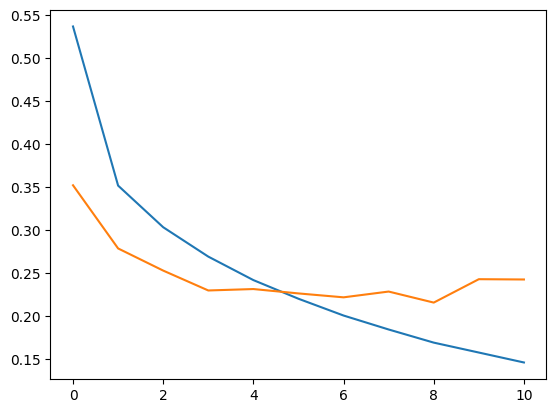

In [14]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

In [15]:
model.evaluate(val_scaled, val_target)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9227 - loss: 0.2413


[0.24232527613639832, 0.9223999977111816]

In [16]:
test_scaled = test_input.reshape(-1, 28, 28, 1)/ 255.0
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9172 - loss: 0.2849


[0.2727490961551666, 0.9160000085830688]

In [17]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]